In [1]:
import pandas as pd

In [61]:
data = pd.read_csv('WHO.csv')

In [62]:
data.head()

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,54.26,0.0,1140,0.0,0.0
1,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,96.39,0.0,8820,0.0,0.0
2,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,98.99,0.0,8310,98.2,96.4
3,Andorra,Europe,78,15.20,22.86,0.00,82,3.2,75.49,0.0,0,78.4,79.4
4,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,48.38,70.1,5230,93.1,78.2


In [63]:
data.shape

(194, 13)

In [64]:
data.isnull().sum()

Country                          0
Region                           0
Population                       0
Under15                          0
Over60                           0
FertilityRate                    0
LifeExpectancy                   0
ChildMortality                   0
CellularSubscribers              0
LiteracyRate                     0
GNI                              0
PrimarySchoolEnrollmentMale      0
PrimarySchoolEnrollmentFemale    0
dtype: int64

In [65]:
sr = (data[data == 0].count()/194)*100

In [66]:
sr

Country                           0.000000
Region                            0.000000
Population                        0.000000
Under15                           0.000000
Over60                            0.000000
FertilityRate                     5.670103
LifeExpectancy                    0.000000
ChildMortality                    0.000000
CellularSubscribers               5.154639
LiteracyRate                     46.907216
GNI                              16.494845
PrimarySchoolEnrollmentMale      47.938144
PrimarySchoolEnrollmentFemale    47.938144
dtype: float64

In [69]:
data.drop(['PrimarySchoolEnrollmentMale', 'PrimarySchoolEnrollmentFemale', 'Country'], axis=1,inplace=True)

In [72]:
sr = (data[data == 0].count()/194)*100

In [73]:
missing_cols = list(sr[sr>0].index)

In [74]:
missing_cols

['FertilityRate', 'CellularSubscribers', 'LiteracyRate', 'GNI']

In [75]:
def fill_missing(cols):
    region = cols[0]
    col_fill = cols[1]
    col_name = cols[2]
#     print(region, col_fill, col_name)
    if col_fill == 0:
        return data[data['Region'] == region][col_name].mean()
    else:
        return col_fill

In [76]:
for col in missing_cols:
    df = data[['Region', col]]
    df['column_name'] = [col for i in range(len(df))]
    data[col] = df.apply(fill_missing, axis=1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [77]:
data[data==0].count()

Region                 0
Population             0
Under15                0
Over60                 0
FertilityRate          0
LifeExpectancy         0
ChildMortality         0
CellularSubscribers    0
LiteracyRate           0
GNI                    0
dtype: int64

In [78]:
import matplotlib.pyplot as plt

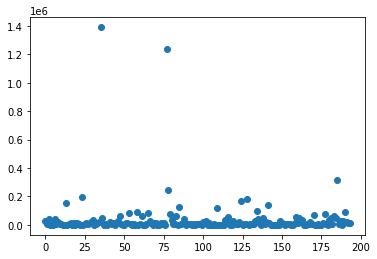

In [79]:
plt.scatter(data['Population'].index, data['Population'])

In [84]:
import numpy as np
from scipy import stats

In [85]:
data[np.abs(stats.zscore(data['Population'])) > 3]

,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI
35,Western Pacific,1390000,17.95,13.42,1.66,76,14.0,73.19,94.300000,8390.0
77,South-East Asia,1240000,29.43,8.10,2.53,65,56.3,72.00,32.627273,3590.0


In [86]:
li = list(data['Population'][np.abs(stats.zscore(data['Population'])) > 3].index)
li

[35, 77]

In [87]:
data.drop(li)['Population'].mean()

23040.807291666668

In [89]:
data.loc[li,'Population'] = data.drop(li)['Population'].mean()

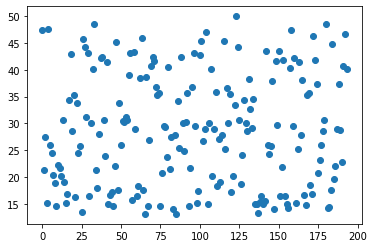

In [90]:
plt.scatter(data['Under15'].index, data['Under15'])

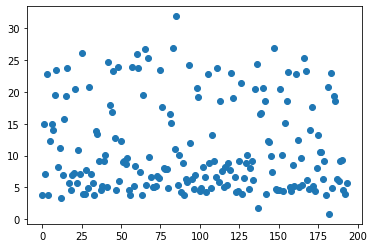

In [91]:
plt.scatter(data['Over60'].index, data['Over60'])

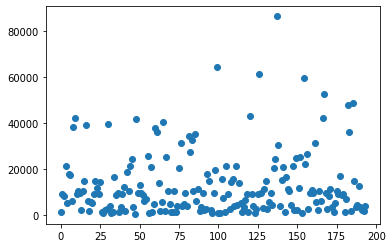

In [92]:
plt.scatter(data['GNI'].index, data['GNI'])

In [94]:
import numpy as np
data[np.abs(stats.zscore(data['GNI'])) > 4]

,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI
137,Eastern Mediterranean,2051.0,13.28,1.73,2.06,82,7.4,123.11,96.3,86440.0


In [95]:
li = list(data['GNI'][np.abs(stats.zscore(data['GNI'])) > 4].index)
li

[137]

In [96]:
data['GNI'].sort_values().iloc[-2]

64260.0

In [97]:
data['GNI'][li] = data['GNI'].sort_values().iloc[-2]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


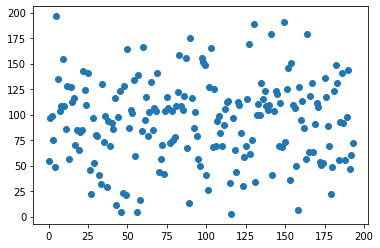

In [98]:
plt.scatter(data['CellularSubscribers'].index, data['CellularSubscribers'])

In [99]:
data.head()

,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI
0,Eastern Mediterranean,29825.0,47.42,3.82,5.400000,60,98.5,54.26,37.509091,1140.000000
1,Europe,3162.0,21.33,14.93,1.750000,74,16.7,96.39,48.458491,8820.000000
2,Africa,38482.0,27.42,7.17,2.830000,73,20.0,98.99,54.071739,8310.000000
3,Europe,78.0,15.20,22.86,1.661509,82,3.2,75.49,48.458491,21272.641509
4,Africa,20821.0,47.58,3.84,6.100000,51,163.5,48.38,70.100000,5230.000000


In [100]:
sorted(data.Region.unique())

['Africa',
 'Americas',
 'Eastern Mediterranean',
 'Europe',
 'South-East Asia',
 'Western Pacific']

In [101]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()

data['Region'] = encoder.fit_transform(data['Region'])

In [102]:
data.head()

,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI
0,2,29825.0,47.42,3.82,5.400000,60,98.5,54.26,37.509091,1140.000000
1,3,3162.0,21.33,14.93,1.750000,74,16.7,96.39,48.458491,8820.000000
2,0,38482.0,27.42,7.17,2.830000,73,20.0,98.99,54.071739,8310.000000
3,3,78.0,15.20,22.86,1.661509,82,3.2,75.49,48.458491,21272.641509
4,0,20821.0,47.58,3.84,6.100000,51,163.5,48.38,70.100000,5230.000000


In [103]:
X = data.drop('LifeExpectancy', axis=1)

In [104]:
y = data['LifeExpectancy']

In [105]:
X.columns

Index(['Region', 'Population', 'Under15', 'Over60', 'FertilityRate',
       'ChildMortality', 'CellularSubscribers', 'LiteracyRate', 'GNI'],
      dtype='object')

# Feature Selection

In [106]:
X.shape[1]

9

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_vif = add_constant(X)
pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])], 
              index=X_vif.columns)

const                  150.676801
Region                   1.598208
Population               1.021940
Under15                 17.300645
Over60                   3.895534
FertilityRate           12.442667
ChildMortality           4.588884
CellularSubscribers      1.984773
LiteracyRate             1.186704
GNI                      2.284319
dtype: float64

In [108]:
import scipy.stats as stats
stats.f_oneway(X['Region'],y)

F_onewayResult(statistic=10082.885411564352, pvalue=9.706078097650169e-279)

In [109]:
columns = list(X.columns)
columns.remove('Region')
print(columns)

correlation = pd.Series([(np.corrcoef(X[i],y)[0,1]) 
                         for i in columns], index=columns)
correlation

['Population', 'Under15', 'Over60', 'FertilityRate', 'ChildMortality', 'CellularSubscribers', 'LiteracyRate', 'GNI']


Population             0.025057
Under15               -0.836467
Over60                 0.688129
FertilityRate         -0.831073
ChildMortality        -0.924564
CellularSubscribers    0.613010
LiteracyRate           0.082812
GNI                    0.643510
dtype: float64

In [110]:
X.drop(['Population', 'LiteracyRate', 'FertilityRate'], axis=1, inplace=True)

In [120]:
from sklearn.model_selection import train_test_split
trainX, testX, trainy, testy = train_test_split(X,y, test_size=0.3)

from sklearn.linear_model import LinearRegression

mlrm = LinearRegression()

mlrm.fit(trainX,trainy)

print(mlrm.score(trainX,trainy)*100)
print(mlrm.score(testX,testy)*100)

89.33716316279569
89.08323648779361


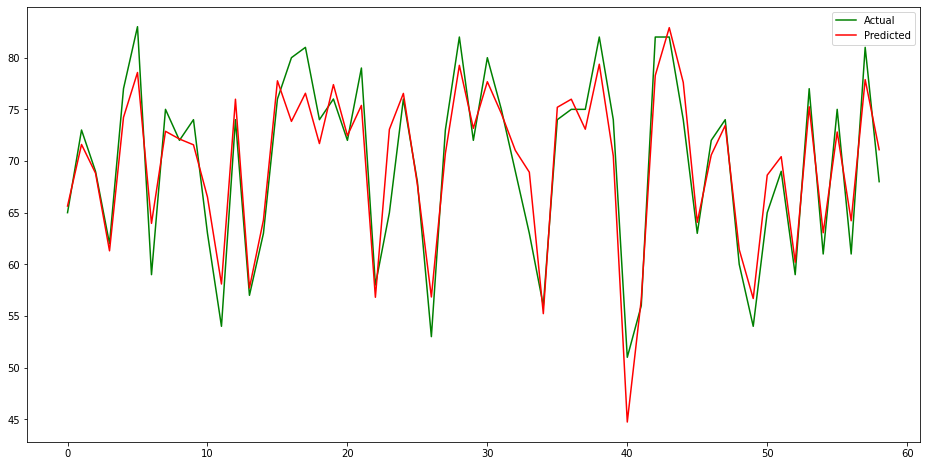

In [121]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
# plt.subplot(211)
plt.plot(testy.reset_index(drop=True), label='Actual', color='g')
# plt.subplot(212)
plt.plot(mlrm.predict(testX), label='Predicted', color='r')
plt.legend(loc='upper right')

In [ ]:
data = pd.read_csv('WHO.csv')
data.shape

In [ ]:
encoder = preprocessing.LabelEncoder()

for i in data.columns:
    if isinstance(data[i][0], str):
            data[i] = encoder.fit_transform(data[i])

In [ ]:
X = data.drop('LifeExpectancy', axis=1)

y = data['LifeExpectancy']

In [ ]:
from sklearn.preprocessing import StandardScaler 
import numpy as np
  
scalar = StandardScaler() 
  
# scalar.fit(X) 
# scaled_data = scalar.transform(X) 

scaled_data = scalar.fit_transform(X)

# Importing PCA 
from sklearn.decomposition import PCA 
  

pca = PCA() 
pca.fit(scaled_data) 


variance = pca.explained_variance_ratio_ #calculate variance ratios
print(np.round(pca.explained_variance_ratio_, decimals=3)*100)

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
print(var)

In [ ]:
pca = PCA(n_components=8) 
X_transformed = pca.fit_transform(X) 

X_transformed.shape

In [ ]:
from sklearn.model_selection import train_test_split
trainX, testX, trainy, testy = train_test_split(X_transformed,y, test_size=0.3, random_state=1)

from sklearn.linear_model import LinearRegression

mlrm = LinearRegression()

mlrm.fit(trainX,trainy)

print(mlrm.score(trainX,trainy)*100)
print(mlrm.score(testX,testy)*100)

In [ ]:
x = (mlrm.coef_)/(mlrm.coef_.sum())

In [ ]:
x.sum()

In [ ]:
x